# **Predictive Analysis of Customer Churn for a Subscription Service**

### Importing All Required Libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

### Data Import and Exploration

In [115]:
from google.colab import files
import pandas as pd

file_upload = files.upload()
data = pd.read_csv(next(iter(file_upload)))

print("\n\nFirst five rows of the dataset:")
print(data.head(10))

print("\nDataset shape:", data.shape)

print("\nDataset Information:")
print(data.info())

missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])

print("\nSummary Statistics:")
print(data.describe())

print("\nTop 5 rows of numeric columns:")
print(data.select_dtypes(include=['number']).head(5))


Saving churn_data.csv to churn_data (5).csv


First five rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService Onlin

### Exploratory Data Analysis (EDA)

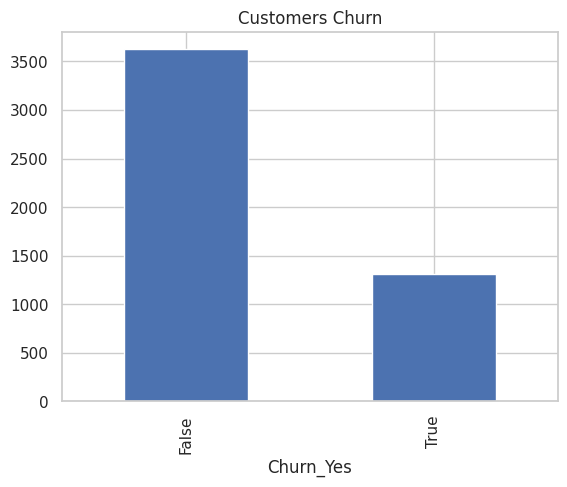

In [116]:
y_train.value_counts().plot(kind='bar')
plt.title('Customers Churn')
plt.show()

<ipython-input-117-5a8c7b725016>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Churn', palette='viridis')


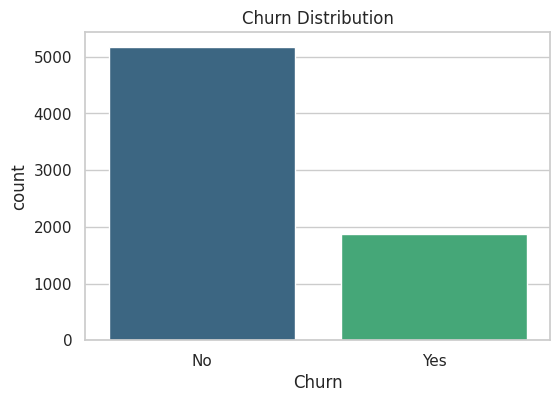

In [117]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Churn', palette='viridis')
plt.title("Churn Distribution")
plt.show()

Distribution of Numerical Features

<ipython-input-118-14437f11f6f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=feature, palette='viridis')
<ipython-input-118-14437f11f6f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=feature, palette='viridis')
<ipython-input-118-14437f11f6f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=feature, palette='viridis')


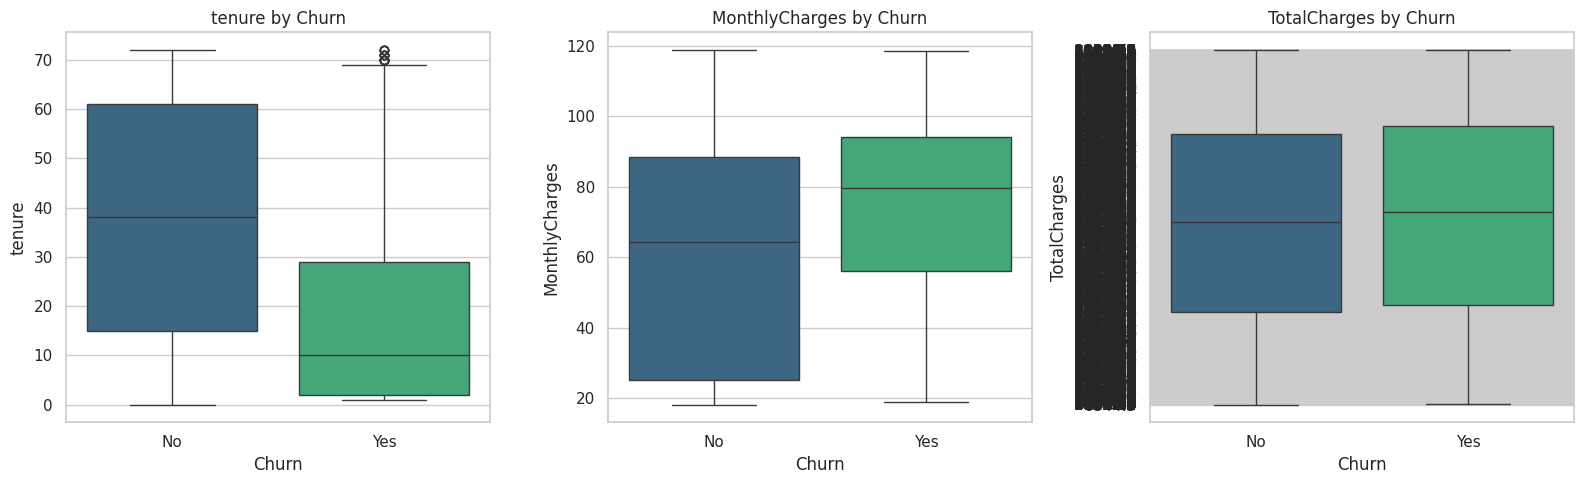

In [118]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(16, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x='Churn', y=feature, palette='viridis')
    plt.title(f"{feature} by Churn")
plt.tight_layout()
plt.show()

Distribution of Categorical Features

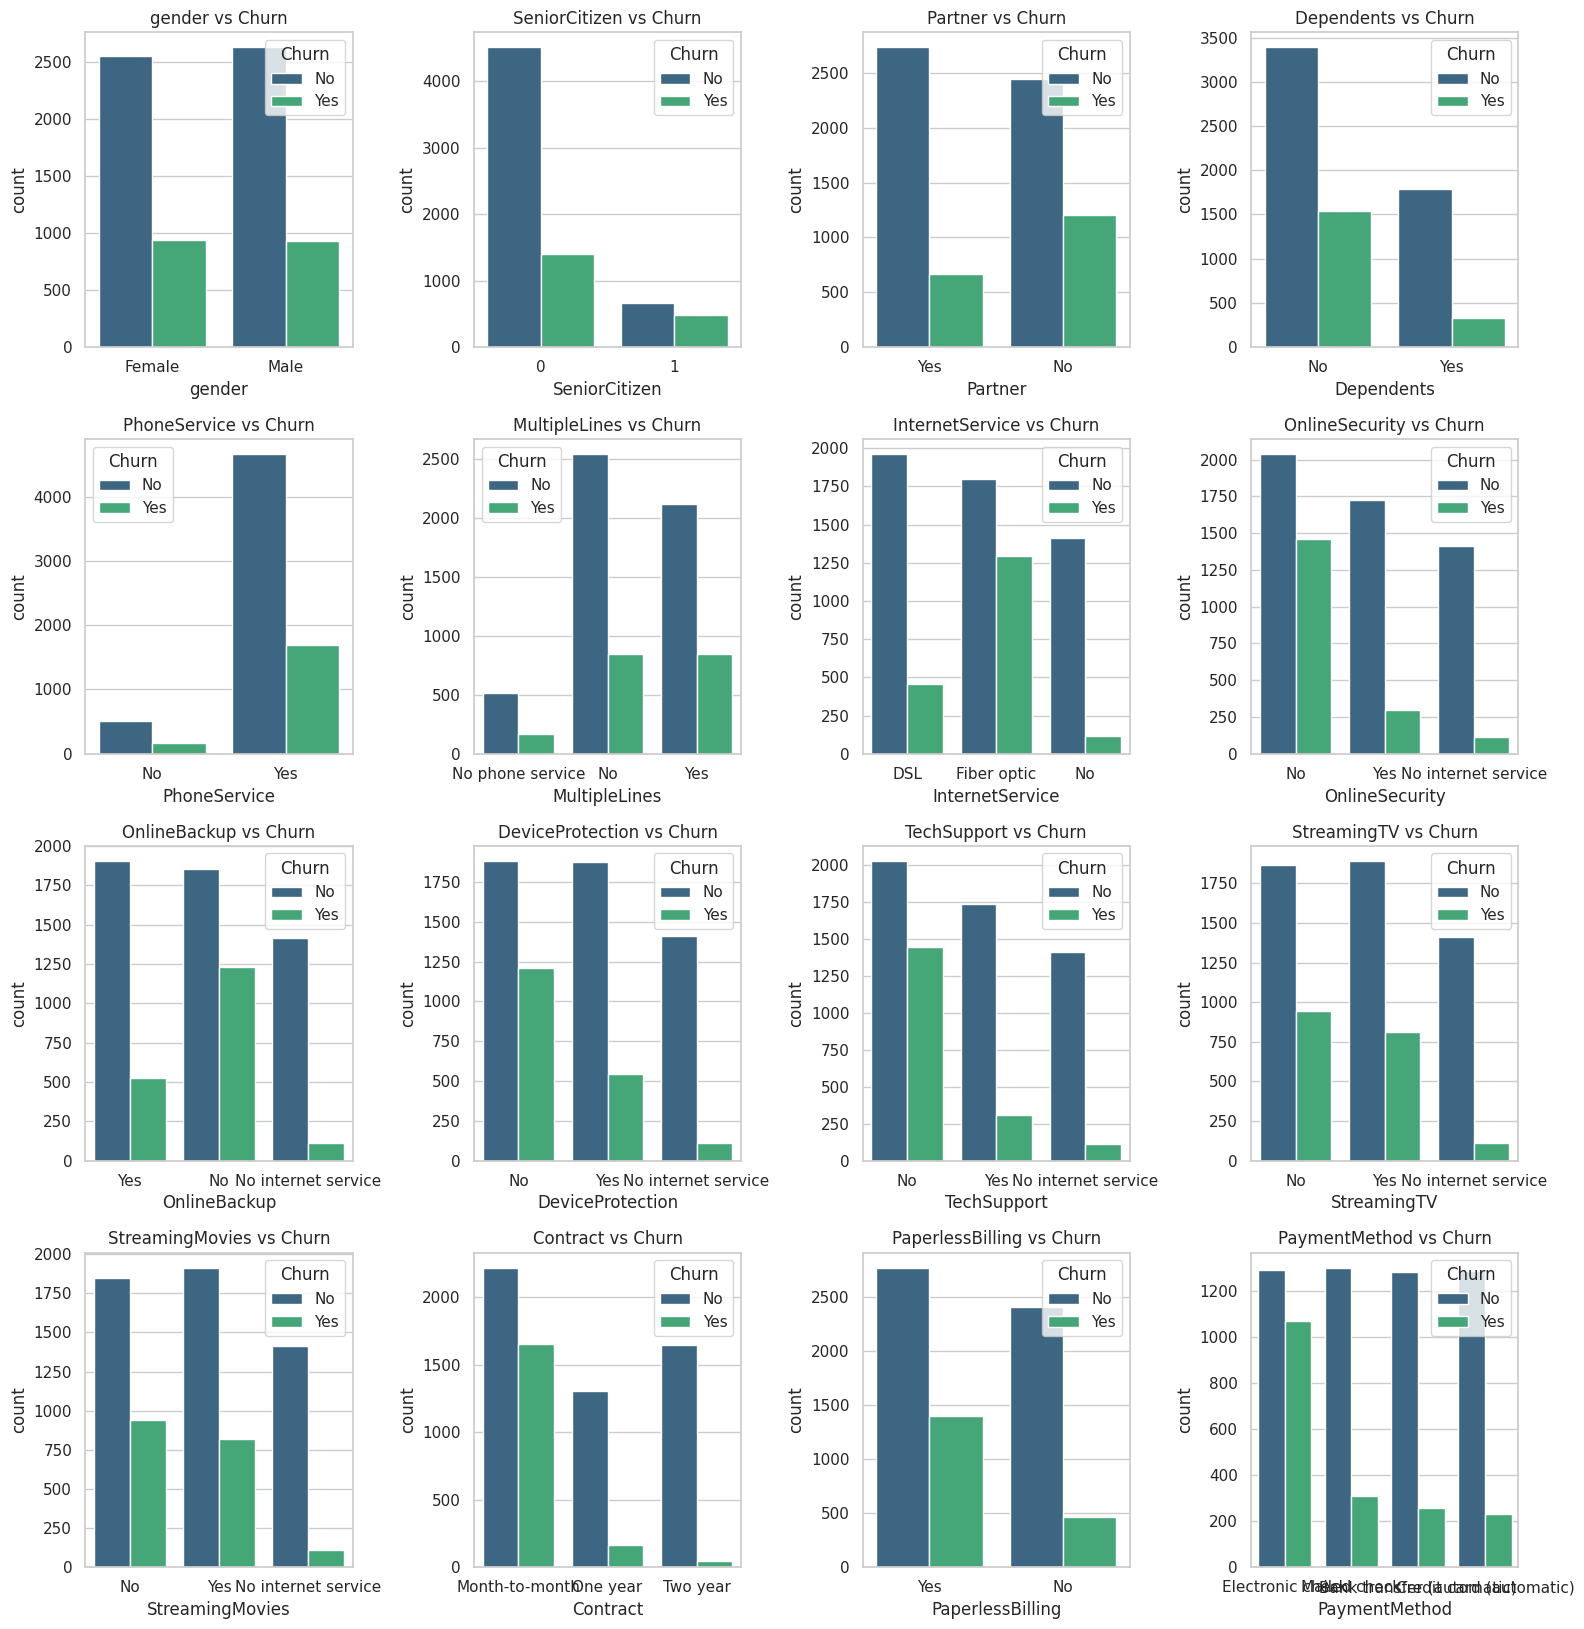

In [119]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(16, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)
    sns.countplot(data=data, x=feature, hue='Churn', palette='viridis')
    plt.title(f"{feature} vs Churn")
plt.tight_layout()
plt.show()

## **Data Cleaning**

### Handling Missing Values

In [120]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

print("\nMissing values after converting TotalCharges:")
print(data.isnull().sum())

data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


Missing values after converting TotalCharges:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<ipython-input-120-82ef03a6c11b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


### Dropping Unnecessary Columns

In [121]:
data = data.drop('customerID', axis=1)

### Encoding Binary and other Categorical Variables (One Hot Encoding)

In [122]:
data = pd.get_dummies(data, drop_first=True)

### Feature Scaling

In [123]:
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Data Preprocessing complete. Feature matrix shape:", X_resampled.shape)

Data Preprocessing complete. Feature matrix shape: (10348, 30)


## Dimensionality Reduction Using PCA


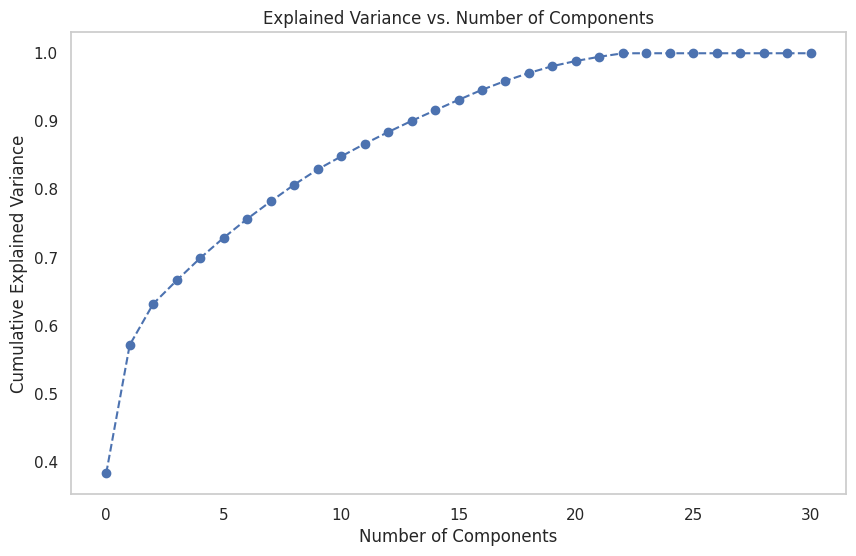

In [124]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [125]:
pca_95 = PCA(n_components=0.99)

data_pca = pca_95.fit_transform(data)

print("Original shape:", data.shape)
print("Transformed shape:", data_pca.shape)

Original shape: (7043, 31)
Transformed shape: (7043, 22)


## **Model Building**

### Splitting the Dataset

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Model Training

In [127]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

### Model Evaluation

Accuracy: 0.8102224325603408
Precision: 0.6702127659574468
Recall: 0.5614973262032086
F1 Score: 0.6110572259941804
AUC Score: 0.8448422597717625

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.90      0.87      1552
        True       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



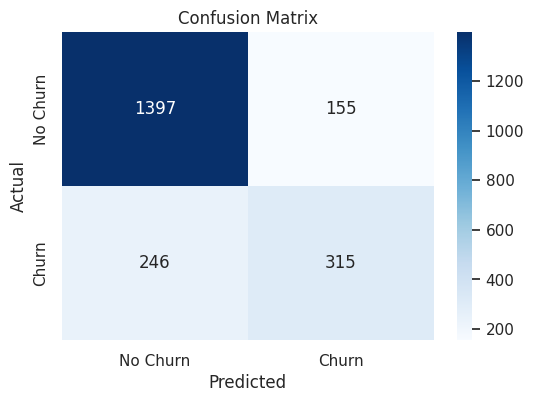

In [128]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Plotting ROC Curve

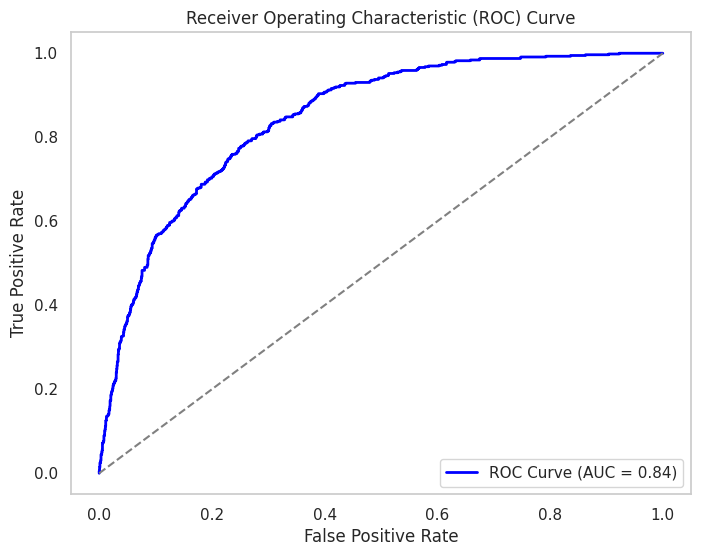

In [129]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 45-degree diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# **Documentation and Reporting**

## Data Sources:

The dataset used in this project was obtained from Kaggle, containing customer data including demographic details, service usage, and whether a customer churned (indicated by the 'Churn_Yes' column). The goal of the project is to predict customer churn and understand the key factors that influence it.

## Data Description:

The dataset includes the following features:

SeniorCitizen: Indicates if the customer is a senior citizen (1) or not (0).   
Tenure: Number of years the customer has been with the service.   
MonthlyCharges: Monthly charges for the service.   
TotalCharges: Total amount charged to the customer.   
Gender: Gender of the customer (Male/Female).   
Partner: Indicates if the customer has a partner (Yes/No).   
Dependents: Indicates if the customer has dependents (Yes/No).    
Service Features: Various features like phone service, internet service, online security, etc. (Yes/No).   
Contract: Type of contract (One year/Two years).   
PaymentMethod: Method of payment (Credit card, Electronic check, Mailed check).   
Churn_Yes: Target variable, indicating if the customer churned (1) or stayed (0).   


Model Evaluation:  
* Accuracy: 0.81  
* Precision: 0.67   
* Recall: 0.56  
* F1 Score: 0.61  
* AUC Score: 0.84  

## Insights Obtained:

Tenure: Customers with shorter tenure tend to churn more, as the likelihood of churn decreases over time with customer loyalty.   
Monthly Charges & Total Charges: Customers with lower total charges and higher monthly charges are more likely to churn, possibly indicating dissatisfaction with the service provided for the cost.   
Internet Service & Contract: Customers who are not subscribed to fiber optic internet or those with shorter contracts (e.g., one year) have a higher likelihood of churn.   
Payment Method: Customers who opt for electronic checks or mailed checks exhibit a higher churn rate compared to those using credit cards.   
Dependents and Partner: Customers with dependents and partners are less likely to churn, suggesting that family-oriented individuals are more likely to remain with the service.   

## Conclusion:

The model is good at predicting non-churn customers, but less accurate in identifying churned ones (56% recall). The AUC score of 0.84 shows decent model distinction between classes. Improvements can be made by tuning hyperparameters and adding more features.